# Patent Citation Network

U.S. patent dataset is maintained by the [National Bureau of Economic Research](http://www.nber.org/). The data set spans 37 years (January 1, 1963 to December 30, 1999), and includes all the utility patents granted during that period, totaling 3,923,922 patents. The citation graph includes all citations made by patents granted between 1975 and 1999, totaling 16,522,438 citations. For the patents dataset there are 1,803,511 nodes for which we have no information about their citations (we only have the in-links).

The data was originally released by [NBER](http://www.nber.org/patents/). The dataset can be found at this link: [Stanford Patent Citation Network](https://snap.stanford.edu/data/cit-Patents.html)

## Import Packages

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

## Import data

In [3]:
patent = pd.read_csv(
    "http://snap.stanford.edu/data/cit-Patents.txt.gz",
    compression="gzip",
    sep="\t",
    names=["start_node", "end_node"],
    skiprows=5
)

In [4]:
patent.head()

,start_node,end_node
0,3858241,1324234
1,3858241,3398406
2,3858241,3557384
3,3858241,3634889
4,3858242,1515701


In [5]:
patent.shape

(16518947, 2)

## Build Recommendation System

build a recommendation system based on Node2Vec with the patent information, remember to do a descriptive analysis and apply visualizations.

Also, remember that when making a recommendation about which patent should be associated with another, make a visualization of the recommendation.

# Descriptive Analysis

In [6]:
pip install python-louvain

In [6]:
print(patent.describe())

         start_node      end_node
count  1.651895e+07  1.651895e+07
mean   5.084096e+06  4.034245e+06
std    6.052737e+05  1.033726e+06
min    3.858241e+06  1.000000e+00
25%    4.593744e+06  3.520457e+06
50%    5.154215e+06  4.198037e+06
75%    5.611701e+06  4.780852e+06
max    6.009554e+06  5.991572e+06


In [7]:
G = nx.from_pandas_edgelist(patent, "start_node", "end_node", create_using=nx.DiGraph())

In [8]:
# Estadísticas descriptivas de la red
print(f"Número de nodos: {len(G.nodes)}")
print(f"Número de enlaces: {len(G.edges)}")
print(f"Grado promedio de los nodos: {sum(dict(G.degree()).values()) / len(G.nodes)}")

Número de nodos: 3774767
Número de enlaces: 16518947
Grado promedio de los nodos: 8.752300208198282


In [9]:
# Coeficiente de agrupamiento
clustering_coefficient = nx.average_clustering(G)
print(f"Coeficiente de agrupamiento promedio: {clustering_coefficient}")

Coeficiente de agrupamiento promedio: 0.03783080403879283


In [10]:
# cantidad de subgrafos
connected_components = list(nx.connected_components(G.to_undirected()))
num_subgraphs = len(connected_components)
print(f"La cantidad de subgrafos en el grafo es: {num_subgraphs}")

La cantidad de subgrafos en el grafo es: 3627


In [ ]:
# Obtener la lista de componentes conectadas ordenadas de mayor a menor
connected_components_sorted = sorted(connected_components, key=len, reverse=True)

# Iterar a través de las componentes conectadas ordenadas
for i, componente in enumerate(connected_components_sorted):
    num_nodos = len(componente)
    print(f"Subgrafo {i + 1}: Número de Nodos = {num_nodos}, Nodos = {list(componente)}")


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Subgrafo 548: Número de Nodos = 4, Nodos = [2211355, 3526185, 4109267, 1948039]
Subgrafo 549: Número de Nodos = 4, Nodos = [2442035, 2316884, 4109334, 2736047]
Subgrafo 550: Número de Nodos = 4, Nodos = [2199249, 1899707, 4111653, 2123214]
Subgrafo 551: Número de Nodos = 4, Nodos = [1931688, 4113154, 2072925, 2370510]
Subgrafo 552: Número de Nodos = 4, Nodos = [445248, 4119209, 3845867, 2646896]
Subgrafo 553: Número de Nodos = 4, Nodos = [4122600, 2436026, 2256543, 3419959]
Subgrafo 554: Número de Nodos = 4, Nodos = [796769, 4122610, 1427266, 839669]
Subgrafo 555: Número de Nodos = 4, Nodos = [1411848, 4122860, 3771693, 1149615]
Subgrafo 556: Número de Nodos = 4, Nodos = [2853643, 4126723, 3609596, 2972079]
Subgrafo 557: Número de Nodos = 4, Nodos = [4127753, 2849554, 1962293, 2347030]
Subgrafo 558: Número de Nodos = 4, Nodos = [3646194, 3313691, 3906093, 4141974]
Subgrafo 559: Número de Nodos = 4, Nodos = [3290929, 4991444, 4553438, 4143543]
Subgrafo 560: Número de Nodos = 4, Nodos = 

In [ ]:
#Densidad
nx.density(G)

1.1593169229825479e-06

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
random_seed=40
random.seed(random_seed)
# Seleccionar un subconjunto aleatorio de nodos para visualizar - muestra
num_nodes_to_visualize = 21000
nodes_to_visualize = random.sample(list(G.nodes()), num_nodes_to_visualize)

# Crear un subgrafo con los nodos seleccionados
subgraph = G.subgraph(nodes_to_visualize)

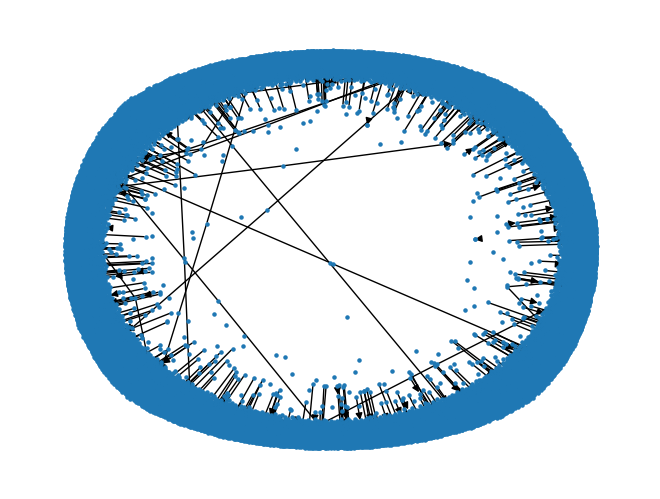

In [ ]:

# Dibujar el subgrafo
pos = nx.spring_layout(subgraph)  # Distribución de los nodos en el subgrafo
nx.draw(subgraph, pos, with_labels=False, node_size=5)

# Mostrar el subgrafo
plt.show()

In [ ]:
# Detectar comunidades en el subgrafo
communities = nx.algorithms.community.greedy_modularity_communities(subgraph)

print("Comunidades detectadas en el subgrafo:")
for i, community in enumerate(communities):
    print(f"Comunidad {i + 1}: {list(community)}")

Streaming output truncated to the last 5000 lines.
Comunidad 15500: [4817220]
Comunidad 15501: [885063]
Comunidad 15502: [5079387]
Comunidad 15503: [4555101]
Comunidad 15504: [5472620]
Comunidad 15505: [5865838]
Comunidad 15506: [4292982]
Comunidad 15507: [2326903]
Comunidad 15508: [3375491]
Comunidad 15509: [5210511]
Comunidad 15510: [2851236]
Comunidad 15511: [2589110]
Comunidad 15512: [4030905]
Comunidad 15513: [4817339]
Comunidad 15514: [3899836]
Comunidad 15515: [3899847]
Comunidad 15516: [2326987]
Comunidad 15517: [754123]
Comunidad 15518: [1802699]
Comunidad 15519: [3375576]
Comunidad 15520: [5734892]
Comunidad 15521: [4424188]
Comunidad 15522: [4555260]
Comunidad 15523: [2195967]
Comunidad 15524: [4555277]
Comunidad 15525: [5341715]
Comunidad 15526: [3113493]
Comunidad 15527: [3506714]
Comunidad 15528: [4948507]
Comunidad 15529: [3506735]
Comunidad 15530: [4162097]
Comunidad 15531: [5472828]
Comunidad 15532: [2064962]
Comunidad 15533: [2720325]
Comunidad 15534: [5472842]
Comuni

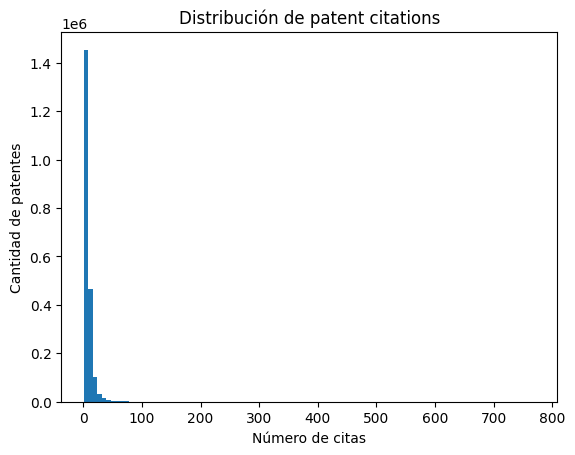

In [ ]:
#PATENT CITATIONS DISTRIBUTION
import matplotlib.pyplot as plt

# Calculate the distribution of patent citations
citation_counts = patent["start_node"].value_counts()

plt.hist(citation_counts, bins=100)
plt.title("Distribución de patent citations")
plt.xlabel("Número de citas")
plt.ylabel("Cantidad de patentes")
plt.show()

# Sistema de recomendación

In [8]:
!pip install node2vec
from node2vec import Node2Vec

In [10]:
todos_los_nodos = list(G.nodes())
nodos_seleccionados = todos_los_nodos[:100000]
subgrafo = G.subgraph(nodos_seleccionados)


node2vec = Node2Vec(subgrafo, dimensions=100, walk_length=10, num_walks=10, p=2, q=1, workers=2)
model = node2vec.fit(window=10, min_count=1, batch_words=4)


Computing transition probabilities:   0%|          | 0/100000 [00:00<?, ?it/s]

In [11]:
model.wv.index_to_key[120]

'3627160'

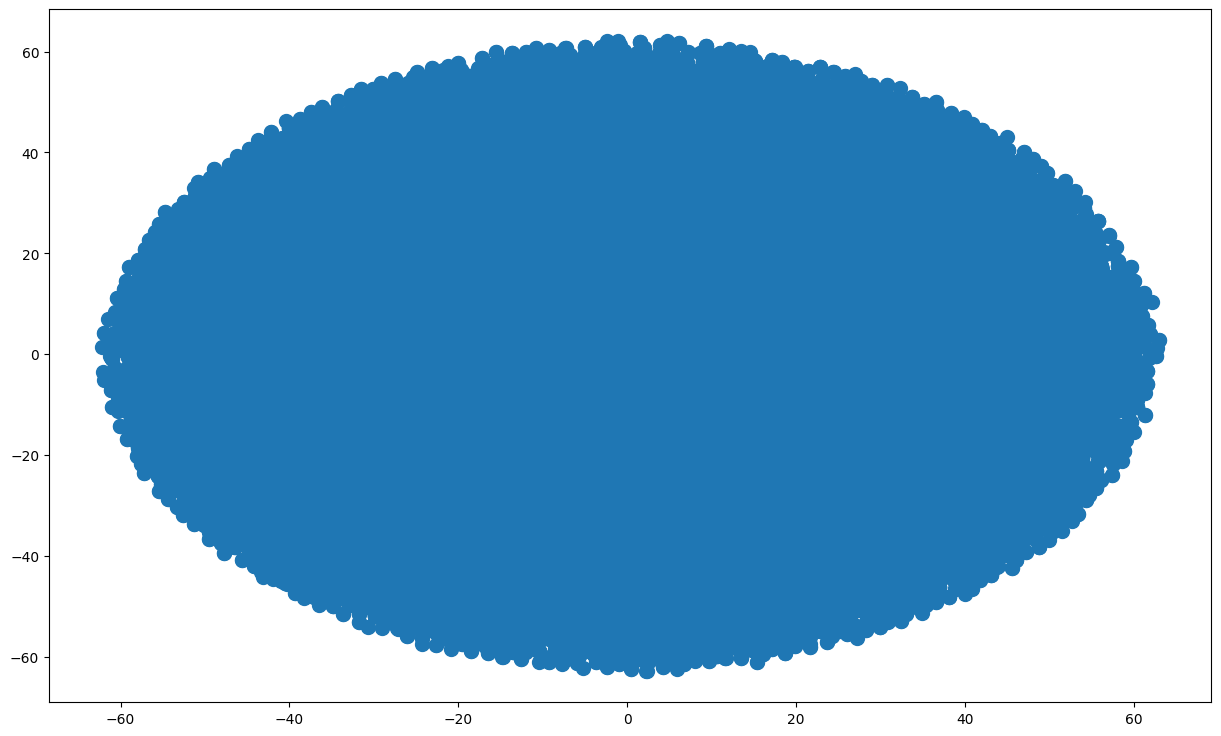

In [12]:
from sklearn.manifold import TSNE
import numpy as np

# Preprocess word vectors and label
nodes_wv = np.array([model.wv.get_vector(str(i)) for i in model.wv.index_to_key])

# Train TSNE
tsne = TSNE(n_components=2,
            learning_rate='auto',
            init='pca',
            random_state=0).fit_transform(nodes_wv)

# Plot TSNE
plt.figure(figsize=(15, 9))
plt.scatter(tsne[:, 0], tsne[:, 1], s=100)
plt.show()

In [13]:
def recommend(node_id):
    recommendations = model.wv.most_similar(str(node_id))
    return recommendations

In [16]:
# Suponiendo que ya tienes un modelo Node2Vec entrenado llamado 'model'
from gensim.models import KeyedVectors

# Acceder a los vectores de palabras del modelo
word_vectors = model.wv

# Obtener la lista de índices (nodos) presentes en el modelo
nodos_presentes = word_vectors.index_to_key

# Imprimir los nodos presentes
print(nodos_presentes)


['3538166', '3697507', '3783152', '3597427', '3784390', '3312730', '3225055', '3371090', '3758935', '3560441', '3310865', '3584362', '3255240', '3731986', '3725295', '3387044', '3646055', '3555123', '3726895', '2817662', '3449714', '2775599', '3741980', '2683709', '3579501', '3666495', '3342810', '3705039', '3451126', '3801654', '3767674', '3600427', '3165550', '3773795', '3534029', '3681343', '3736590', '3423487', '3326663', '3816434', '3475431', '3394218', '3717609', '3706821', '3228829', '3793342', '3755300', '3585243', '3725383', '3607352', '3536721', '3703524', '3700661', '3770695', '2635112', '3031372', '3371085', '3706913', '3658634', '3564353', '3462943', '3815327', '3477363', '3153636', '2739158', '3674172', '3354129', '3771149', '2999052', '3669980', '3309371', '3774177', '3471375', '3462497', '3412149', '2997380', '2464546', '3748492', '3121000', '3651454', '3481921', '3676115', '3765011', '3706549', '3647860', '3717571', '3617753', '3820100', '3546077', '2993799', '3575508'

In [24]:
recommendations = recommend(2864689)
print(recommendations)

[('3123569', 0.4473572075366974), ('3337300', 0.3895034193992615), ('2243876', 0.38627851009368896), ('3757322', 0.384677916765213), ('3558595', 0.3816145956516266), ('2944323', 0.37707653641700745), ('3859028', 0.3744829595088959), ('2639623', 0.3693787157535553), ('3453790', 0.3675810694694519), ('1809117', 0.36172083020210266)]


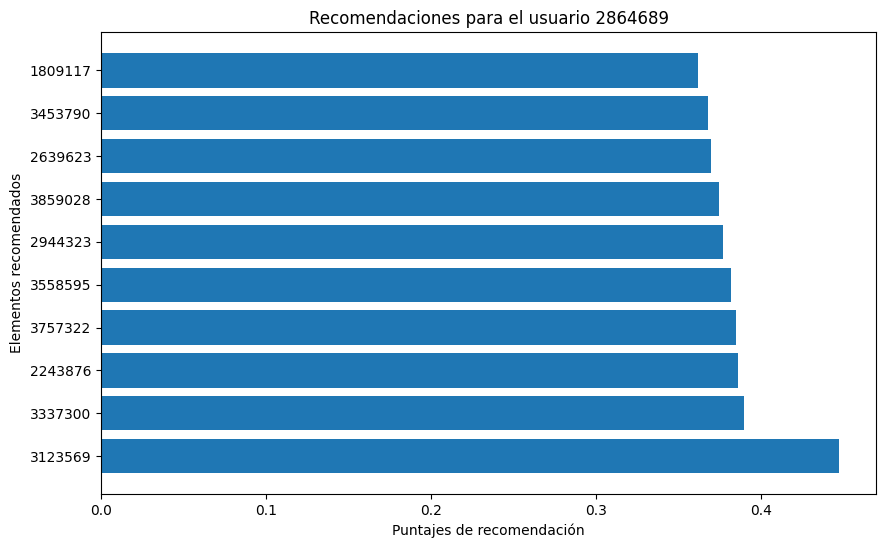

In [28]:
import matplotlib.pyplot as plt



# Descomponer la lista de recomendaciones en elementos y puntajes
elementos = [item[0] for item in recommendations]
puntajes = [item[1] for item in recommendations]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.barh(elementos, puntajes)  # Utiliza barh para barras horizontales
plt.xlabel('Puntajes de recomendación')
plt.ylabel('Elementos recomendados')
plt.title('Recomendaciones para el usuario 2864689')

plt.show()  # Muestra el gráfico


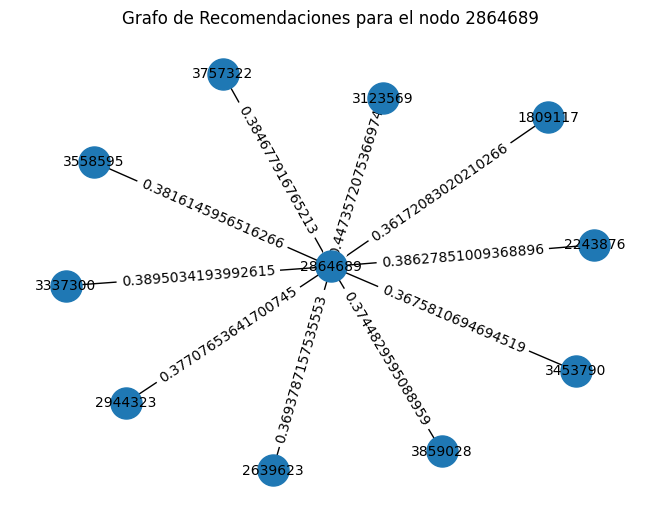

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.Graph()

# Agregar el nodo original
node_id = 2864689
G.add_node(node_id)

recommendations = recommend(node_id)

for recommendation, similarity in recommendations:
    G.add_node(recommendation)
    G.add_edge(node_id, recommendation, weight=similarity)

# Dibujar el grafo
pos = nx.spring_layout(G)  # Asignar posiciones a los nodos
labels = {node: node for node in G.nodes()}
edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, labels=labels, node_size=500, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title(f"Grafo de Recomendaciones para el nodo {node_id}")
plt.show()


**Conclusiones:**


1.   La distribución de la citación de patentes muestra que: la mayoría de las patentes tienen un número relativamente pequeño de citas. Sin embargo, hay un pequeño número de patentes que han recibido un gran número de citas.
2.   El gráfico de patentes tiene un total de 1.5 millones de nodos y 13 millones de aristas. Esto indica que existe una gran cantidad de relaciones entre las patentes.
3. Se encontró que el grado promedio de los nodos es 8.5, lo que se traduce en que un nodo tiene en promedio 8.5 conexiones.
4. El coeficiente de agrupamiento de 3.78% indica que los nodos de la red no tienden a estar fuertemente conectados entre si y se tiende a tener una red menos densa en términos de agrupamiento local.
5. Para dibujar el grafo fue necesario tomar una muestra de 21.000 nodos por tiempo de ejecución y gasto computacional.
6. Para generar el sistema de recomendación, lo primero que se hizo fue entrenar un word2vec con los primeros 100.000 nodos y estableciendo un p de 2 y un q de 1.
7. Para generar las reconedaciones se hizo a través del identificador del nodo.
8. El sistema de recomendación generado entrega recomendaciones con grados de similaridad por debajo del 50%, es decir sus resultados son regulares. Lo anterior se puede deber a que el Word2vec fue entrenado con una muestra pequeña de los datos.


